In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("./simulation_results/simulation_summary.csv")
data

,max_door_frequency,radius,seed,turns,goal_reached,wait_penalty,wait_max_penalty,revisit_penalty,revisit_max_penalty,direction_vector_max_weight,direction_vector_multiplier,direction_vector_pov
0,3,5,0,118,False,0.1,3,0.15,2,2,0.02,25
1,3,5,1,1500,False,0.1,3,0.15,2,2,0.02,25
2,3,5,2,1500,False,0.1,3,0.15,2,2,0.02,25
3,3,5,0,1500,False,0.1,3,0.15,2,2,0.02,50
4,3,5,1,1500,False,0.1,3,0.15,2,2,0.02,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1057,10,5,1,5000,False,0.3,3,0.15,2,2,0.02,25
1058,10,5,2,5000,False,0.3,3,0.15,2,2,0.02,25
1059,10,5,0,5000,False,0.3,3,0.15,2,2,0.02,50
1060,10,5,1,5000,False,0.3,3,0.15,2,2,0.02,50


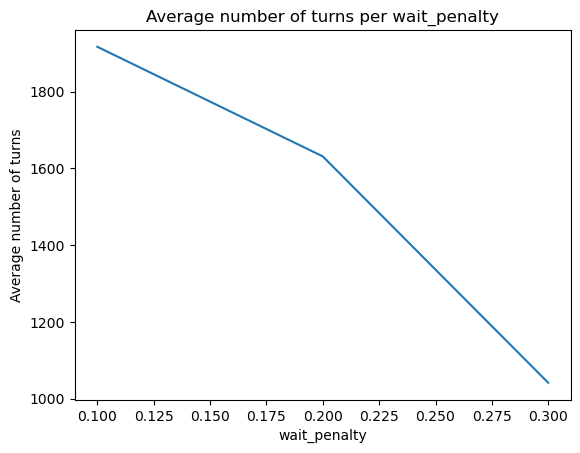

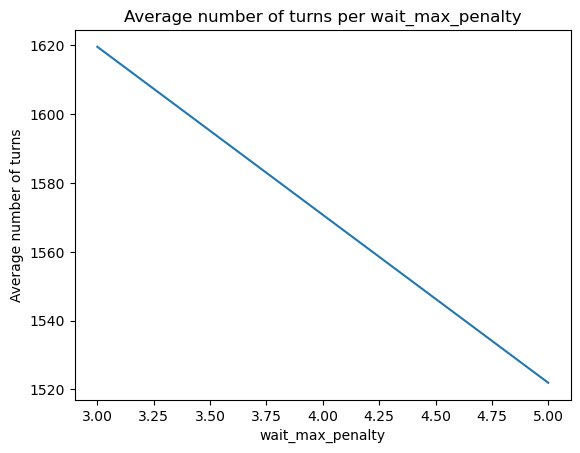

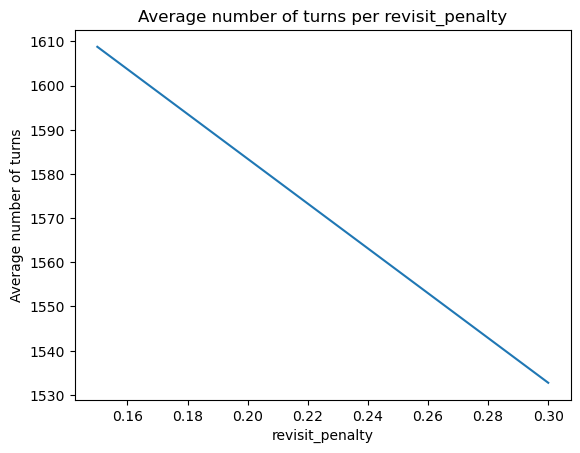

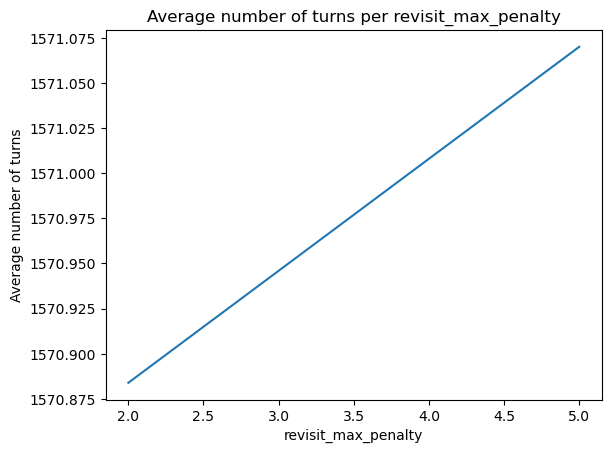

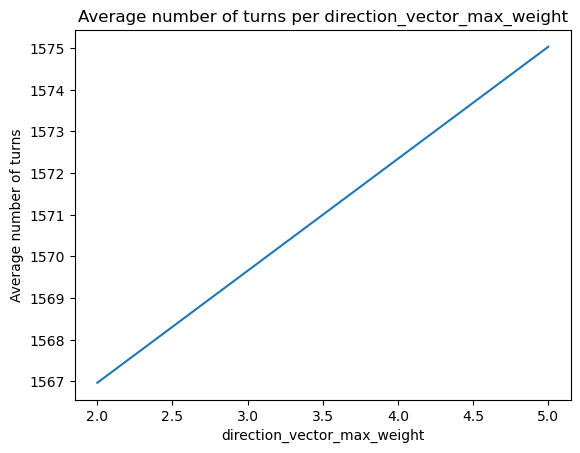

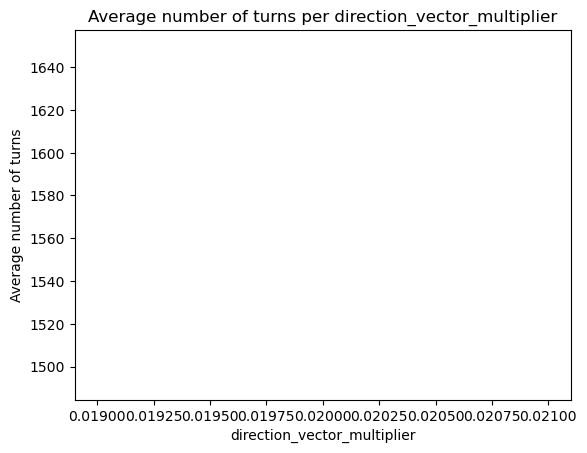

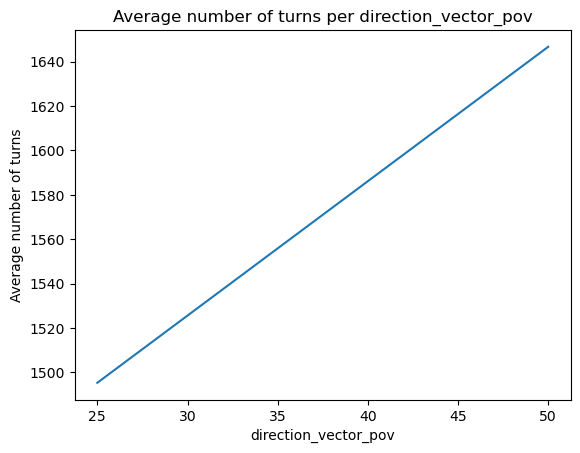

In [2]:
# Group by the relevant fields and calculate the average number of turns
fields = [
    "wait_penalty",
    "wait_max_penalty",
    "revisit_penalty",
    "revisit_max_penalty",
    "direction_vector_max_weight",
    "direction_vector_multiplier",
    "direction_vector_pov",
]

for field in fields:
    # Calculate the average number of turns for each field
    avg_turns_per_field = data.groupby(field)["turns"].mean().reset_index()

    # Plot the results
    plt.figure()
    plt.plot(avg_turns_per_field[field], avg_turns_per_field["turns"])
    plt.xlabel(field)
    plt.ylabel("Average number of turns")
    plt.title("Average number of turns per " + field)
    plt.show()

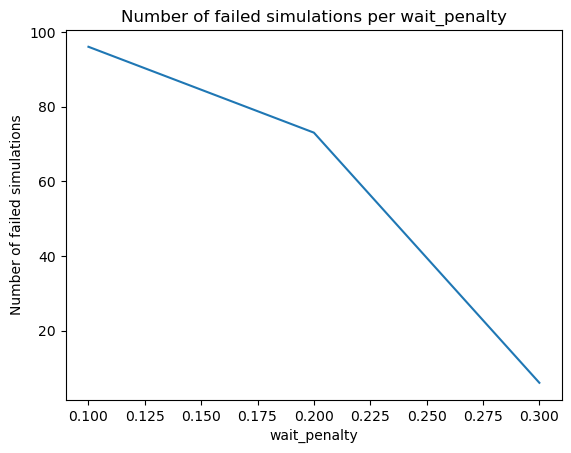

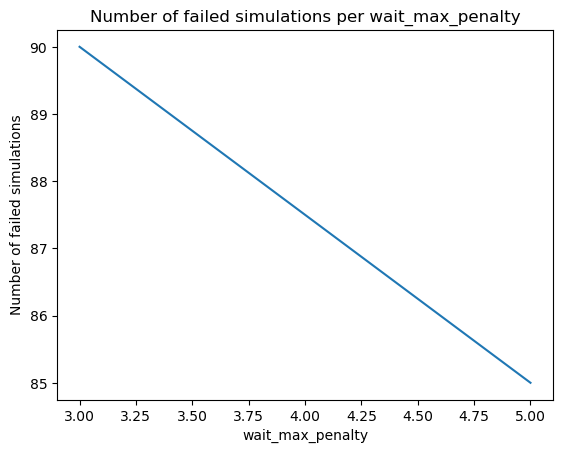

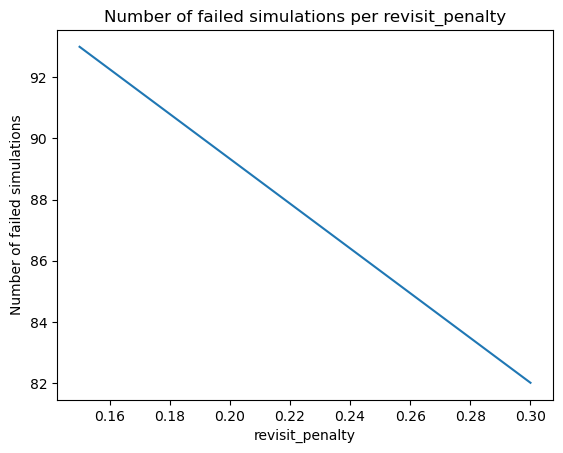

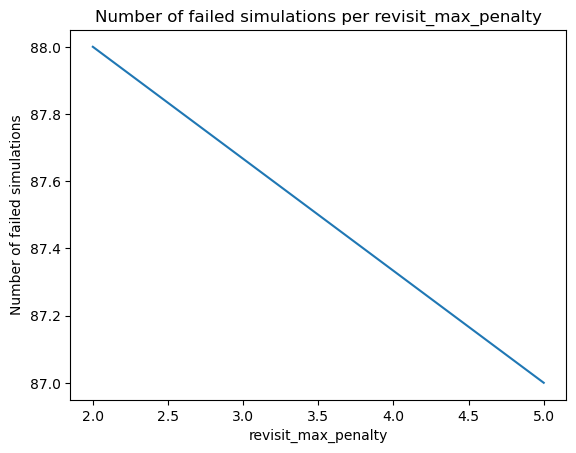

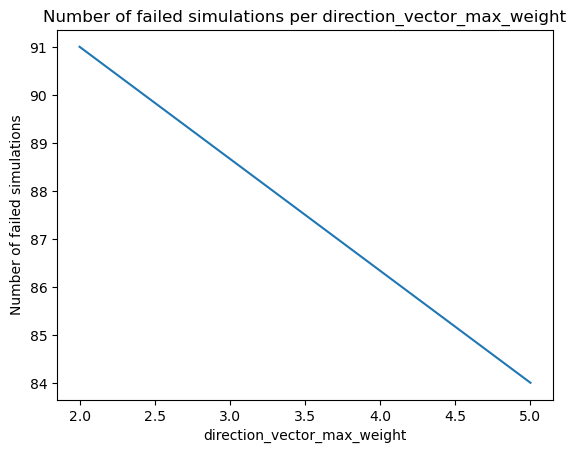

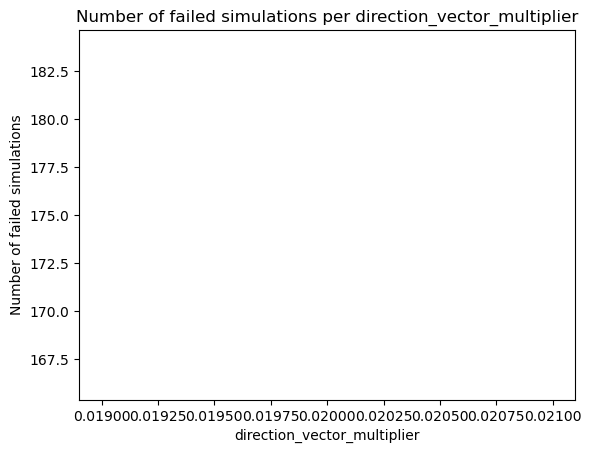

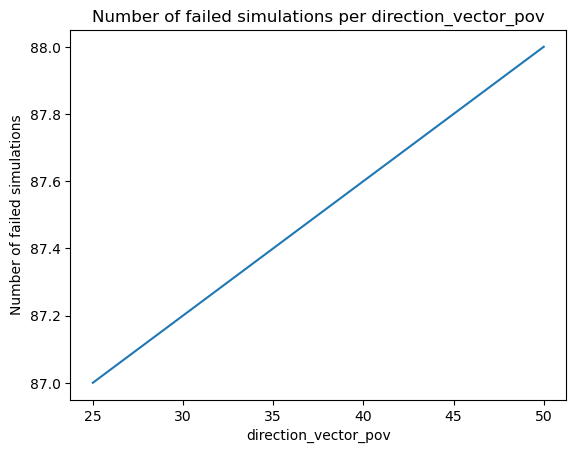

In [3]:
max_turns = 2000

failed = data[data["turns"] >= max_turns]

for field in fields:
    # Calculate the number of failed simulations for each field
    num_failed_per_field = failed.groupby(field).size().reset_index(name="num_failed")

    # Plot the results
    plt.figure()
    plt.plot(num_failed_per_field[field], num_failed_per_field["num_failed"])
    plt.xlabel(field)
    plt.ylabel("Number of failed simulations")
    plt.title("Number of failed simulations per " + field)
    plt.show()

In [4]:
for seed in data["seed"].unique():
    avg_turns_per_combination = (
        data[data["seed"] == seed]
        .groupby(fields)["turns"]
        .mean()
        .reset_index()
        .sort_values("turns")
    )
    print(f"Map {seed}: {avg_turns_per_combination.iloc[0]}\n")

Map 0: wait_penalty                      0.300000
wait_max_penalty                  5.000000
revisit_penalty                   0.300000
revisit_max_penalty               5.000000
direction_vector_max_weight       5.000000
direction_vector_multiplier       0.020000
direction_vector_pov             50.000000
turns                          1001.666667
Name: 95, dtype: float64

Map 1: wait_penalty                     0.20
wait_max_penalty                 3.00
revisit_penalty                  0.30
revisit_max_penalty              5.00
direction_vector_max_weight      5.00
direction_vector_multiplier      0.02
direction_vector_pov            50.00
turns                          416.75
Name: 47, dtype: float64

Map 2: wait_penalty                     0.30
wait_max_penalty                 5.00
revisit_penalty                  0.30
revisit_max_penalty              5.00
direction_vector_max_weight      2.00
direction_vector_multiplier      0.02
direction_vector_pov            25.00
turns        